# Сверточные сети для обработки речи


# Одномерные свертки
На прошлых уроках мы познакомились со сверточными нейронными сетями и использовали их для обработки картинок.

Но, конечно, сверточные сети могут работать с любыми типами данных, если их представить в подходящем виде, например, со звуками.

Звук это колебание частичек среды (воздуха). В компьютере звук можно представить двумя способами:
- представление в виде одномерного массива амплитуд звука, снятых с определенной частотой дискретизации (файлы типа wav);
- представление в виде двумерного массива - спектра звукового сигнала. 

![img](https://www.researchgate.net/profile/Selene-Cansino/publication/265643714/figure/fig1/AS:392197573758980@1470518596966/Waveform-left-side-and-spectral-right-side-representations-of-different-sounds-A.png)

Представление в виде спектра можно интерпретировать как картинку, и применять свертки к ней так же, как для фотографий. 

Но и для представления в виде одномерного массива свертки тоже можно применять, только теперь это должны быть *одномерные* свертки, с одномерным ядром, пробегающим вдоль вектора входов. 

К одномерным сверткам, как и к двумерным, можно применять техники сдвига, набивки, распределения и т.п.

![img](https://drive.google.com/uc?id=17jL6lMnRA4-Kg4-fXkz5UF2Mqd-Zq1t0)

# Распознавание речи
Речь это звук, значит можем обрабатывать ее, например, распознавать.  

Общий подход к распознаванию речи такой:
- получить (записать) звук речи,
- сделать предобработку, привести к нужному формату массивов,
- используя **акустическую модель** перевести речь в фонетическое представление или текст,
- возможно улучшить результат, используя лингвистическую модель.

Лингвистическая модель исправляет ошибки акустической и знает верное написание слов и правила языка, особо важно для слов, которые пишутся не так, как слышатся (например: малако - молоко, Эйфьядлоёкудль  - Эйафьятлайокудль и др.), но сегодня не о ней. 

Сегодня нас интересует **акустическая модель**, которая могла бы понимать произносимые звуки.




# Функция ошибки CTC
Казалось бы, построить такую модель - простая задача. Если собрать примеры речи и текста для нее, то можно сделать нейронную сеть, обучить ее. 

Но вот проблема - все люди произносят текст по-разному, в разном темпе. Одни говорят быстро, другие - медленно, а текст тот же!

Значит мы должны привязать каждый произносимый звук речи ко времени, представляете какая это огромная работа? Попробуйте хотя бы для 20 минутного мультфильма это сделать. 

Так не пойдет, в мире очень мало наборов данных, в которых была бы привязка звуков речи ко времени. 


![img](https://drive.google.com/uc?id=18eOt_tWe4SER94cyH4Do1cGN9ar6mgve)



Хоть длительность звуков речи, произносимых разными людьми, разная, в целом звуки похожи. 

Хорошо обученная нейронная сеть может распознать звук речи даже по его части. Тогда мы можем сделать такую систему, которая бы пыталась распознать произносимый сейчас звук речи и делала бы это в заданные моменты времени, например, каждые 0.1 секунды (это число надо подобрать так, чтобы с одной стороны хватало записанной части звука речи для распознавания, а с другой, оно было бы короче чем длительность звука речи).

На этом уроке мы, ради простоты, не будем различать между собой звуки речи и символы алфавита, и будем считать, что при распознавании возвращаются буквы (символы алфавита), но в реальных системах такое различие есть. 



На каждом временном шаге сетью возвращается вектор – выход softmax – уровней уверенности в определенном символе. Если мы выберем символы по максимуму этого уровня, может получиться такое «мммееетаааллл» для произносимого слова «металл», ведь звуки длятся разное время, а сеть возвращает выход на каждом временном такте.

Ладно, просто уберем повторы символов и все, но нет, получим «метал» совершенно другое слово (от глагола метать (бросать, кидать)). Чтобы такое предотвратить ошибка рассчитывается по другому.

Добавляется новый символ «промежуток» (blank, обозначим как «_») который отмечает отсутствие любого символа, и из результата удаляются все повторы символов. 

Используя такой символ мы можем задать наш исходный текст как «метал_л» и если при распознавании получим «ммм___еее_тааал_лл», то после удаления повторов получим искомый «м_е_тал_л» который сведется, после удаления не читаемых промежутков к «металл». Значит сеть должна правильно научиться распознавать и эти символы.

Однако, нам подойдет много вариантов, которые сведутся к правильному тексту и это надо учесть в функции ошибки.


![img](https://miro.medium.com/max/1200/1*1_5KnLvaTkGUFoyat2jHcQ.png)

![img](https://img-blog.csdnimg.cn/20181204160231172.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3pnY3I2NTQzMjE=,size_16,color_FFFFFF,t_70)


Для простоты, пусть есть два символа «а» и «б», добавили к ним символ «_» и просимулировали сеть на два шага по времени t0 , t1, нам вернулись выходы как на рисунке.

![img](https://drive.google.com/uc?id=1dfWL4HPVg8lZ_5qEYRhcSBpYhKwLuH6o)

И пусть наш искомый текст, который соответствует этой речи будет «а».

За два временных шага мы получим выход из двух символов, давайте отберем только такие, которые приводят в итоге к искомому тексту. Это последовательности «аа», «_а», «а_».

**Для последовательности символов их уровни уверенности будем умножать, и сложим результаты для всех возможных комбинаций, приводящих к заданному тексту.** 

В нашем примере $0.4*0.4+0.4*0.6+0.6*0.4=0.64.$

Если б, к примеру, мы думали, что искомый текст был «» (т.е никакой), то к нему привела бы только одна комбинация «_ _», для которой получим $0.6·0.6=0.36$, что меньше, чем 0.64, и мы понимаем что искомый текст был именно «a».


Теперь мы для любой последовательности на выходе можем получить оценку, насколько она «близка» к заданному тексту. 

Такая функция ошибки называется CTC (Connectionist Temporal Classification) и считается как минус логарифм от полученной оценки близости. Жуткие формулы и формальности можно посмотреть в [1].





## Модификации функции ошибки CTC
Использовать символ промежутка сложно, ведь его можно вставить между любыми символами, что сильно увеличивает число комбинаций, приводящих к правильному тексту. 

Поэтому в других работах вводят модификации такой функции:

1) отказались от символа «промежуток», вместо него, в случаях, когда необходимы повторы символов (а мы помним, что повторные удаляются), будут использованы специальные символы «1» и «2», которые будут обозначать сколько раз предыдущий символ должен повторяться. Например, слово «коррекция» было бы записано как «кор1екция», а слово «длинношеее» как «длин1оше2». При таком подходе эти дополнительные символы нужны только в тех словах, где есть повторы символов, тогда как «промежуток» в любое место может быть добавлен. Это существенно снижает размер графа для перебора вариантов написания и увеличивает скорость работы на длинных последовательностях (до 5 раз в экспериментах авторов).

2) отказались от нормализации выходов с помощью softmax и используют не нормализованные, т.е. используют сигмоиду вместо softmax (вы должны помнить, что softmax для расчета одного выхода использует все входы). Это облегчает расширение алфавита, так как теперь выходы не связаны друг с другом и не будут пересчитываться при добавлении нового. Собственно авторы и воспользовались этим добавив к алфавиту символы «1» и «2». Нормализация же будет выполняться для всей записи целиком, а не для каждого временного отсчета.

3) используется полный граф всех возможных переходов символов друг в друга, что дает возможность добавлять в него помимо весов узлов (которые определяются выходами сети) еще и веса ребер, переходов между символами. Последние описывают модель языка и могут быть уже рассчитаны для некоторого алфавита. Причем эти веса также не нормализованы, что позволяет добавлять символы в алфавит без пересчета весов всех остальных.

В итоге получили быстро и точно работающую сеть.

Все операции, которые использует ошибка СТС - дифференцируемые, поэтому обучать нейронную сеть можно привычным нам методом обратного распространения ошибки. Но, конечно, при этом учитывать, что в функции ошибки выход сети используется несколько раз, в зависимости от количества подходящих комбинаций символов Автодифференцирование, встроенное в фреймворки глубокого обучения, вполне справится с этой работой.  




![img](https://s3.ap-south-1.amazonaws.com/techleer/506.png)

# Wav2letter
Придумав функцию ошибки, можем использовать любую подходящую архитектуру нейронной сети. Хорошо показала себя сеть **Wav2letter**[2] из сверточных слоев.

Структура сети довольна проста, см. рисунок. Она содержит сверточные слои со сверткой по времени.
Входом является либо запись речевого сигнала (звуковая последовательность), либо спектр мощности этого сигнала, либо его MFCC (коэффициенты в мел-шкале), первый слой нужен только для записи звука, для других типов входов отсутствует.

Используются одномерные (по оси времени) свертки со сдвигом (stride, обозначено dw, 1 если не указано) с небольшим размером фильтра свертки для глубоких слоев (обозначено kw) и с большим (kw=250) для первого слоя, без набивки. Разумеется, используются и активации, причем авторы нашли, что ReLU и гипертангенс дают примерно одинаковые результаты. Последние слои с размером фильтра kw=1 это сверточные аналоги полносвязных слоев. В последнем слое число фильтров равно числу символов используемого алфавита. Размеры карт признаков обозначены как (число каналов входа : число фильтров свертки), временная ось не показана. 
Всю сеть можно рассматривать как сложную нелинейную свертку входного сигнала с ядром ширины 31280 и сдвигом 320, что при частоте дискретизации 16кГц означает, что символы на выходе будут генерироваться для временного окна в 1955 мс с шагом в 20 мс.

![img](https://drive.google.com/uc?id=1IZ5ZU7S2VBzHWyDv3130b478VEpk0mTq)

Большой сдвиг в первых слоях приводит к существенному уменьшению размеров обрабатываемых массивов, а использование только сверточных слоев дает возможность эффективно распараллелить работу на много процессоров или графические процессоры.


## Wav2Letter+

Мы будем пользоваться уже обученной современной модификацией сети [Wav2Letter+](https://arxiv.org/abs/1712.09444) из проекта [NVIDIA/OpenSeq2Seq](https://github.com/NVIDIA/OpenSeq2Seq.git) чтобы распознать английскую речь из видео на youtube.

Главное отличие этой модификации в изменении архитектуры сверточных слоев. В исходном варианте выходы слоя в разные моменты времени одинаково важны, но ведь это не так на самом деле! Если в речи тишина - она совершенно не важна, не влияет на вид звука речи; когда звук уже почти завершился не очень важно его окончание, вы без труда различаете короткую и длинную "и". Вообще разные моменты времени имеют разную важность, и хотелось бы это учитывать. 

А давайте будем умножать выход в каждый момент времени на коэффициент от 0 до 1, который эту важность и показывает. 

И пусть эти коэффициенты важности тоже будут обучаемые, чтобы сеть сама подбирала их по обучающим данным. 

Можно сделать так: давайте возьмем еще один слой, посчитаем его выходы, и пропустим их через функцию активации сигмоиды, которая и даст число от 0 до 1. И уже выход этого нового слоя умножим на выход основного слоя (поэлементно). Все операции дифференцируемые - метод обратного распространения ошибки работает.

Это вариант вентильного подхода, который мы уже встречали в нашем курсе. 



Еще раз кратко: один сверточный слой заменили на два параллельно работающих (с одинаковым входом), выход второго, вентильного, пропустили через сигмоиду (значения от 0 до 1) и умножили поэлементно на выход первого слоя. Такие слои так и назвали вентильные сверточные (gated convolution). 

(Есть вероятность, что в библиотеке ниже эти слои опять поменяли на обычные сверточные, но с другой функцией активации)


![img](https://drive.google.com/uc?id=1wi9X9DKbNPWiFycJ0oTfwvBD9qYE9LFL)






# Эксперимент с NVIDIA/OpenSeq2Seq

In [ ]:
# используем тензорфлоу первой версии
!pip uninstall tensorflow -y

Found existing installation: tensorflow 2.8.2+zzzcolab20220719082949
Uninstalling tensorflow-2.8.2+zzzcolab20220719082949:
  Successfully uninstalled tensorflow-2.8.2+zzzcolab20220719082949


In [ ]:
!pip install tensorflow==1.15

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 412.3 MB 27 kB/s 
     |████████████████████████████████| 503 kB 57.9 MB/s 
     |████████████████████████████████| 50 kB 8.0 MB/s 
     |████████████████████████████████| 3.8 MB 44.5 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=17465c15d551452b09bad33ce118c346eefac8ac568bc0ff1212e221d7460f65
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting un

In [ ]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/NVIDIA/OpenSeq2Seq.git' # адрес библиотеки 
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # клонируем себе на диск
  !git clone -q --depth 1 {git_repo_url}
  # и ставим вспомогательные библиотеки
  !pip uninstall -y -q pymc3
  !pip install --upgrade joblib
  #!cd {project_name} && pip install -q -r requirements.txt
  !pip install -q youtube-dl librosa python_speech_features sentencepiece
  
  # создаем файлы конфигурации config
  # копируем файл по умолчанию
  !cp {project_name}/example_configs/speech2text/w2lplus_large_8gpus_mp.py {project_name}/conf.py
  # правим его под наши нужды
  !sed -i -e 's/data\/librispeech\/librivox-test-clean/test/' {project_name}/conf.py
  !sed -i -e 's/# "use_lang/"use_lang/' {project_name}/conf.py
  !echo 'backend = "librosa"' >> {project_name}/conf.py 
  #!cat {project_name}/conf.py
  !echo "wav_filename, wav_filesize, transcript" > {project_name}/test.csv
  !echo "test.wav, UNUSED, UNUSED" >> {project_name}/test.csv


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 34.4 MB/s 
     |████████████████████████████████| 1.3 MB 52.6 MB/s 


In [ ]:
import sys
sys.path.append(project_name)
from IPython.display import YouTubeVideo

## Загрузка предобученной модели 

In [ ]:
# загружаем предобученную модель. Если не работает, см. ниже.
def download_from_google_drive(file_id, file_name):
  # download a file from the Google Drive link
  !rm -f ./cookie
  !curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id={file_id}" > /dev/null
  confirm_text = !awk '/download/ {print $NF}' ./cookie
  confirm_text = confirm_text[0]
  !curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm={confirm_text}&id={file_id}" -o {file_name}
  
if not exists(join(project_name, 'w2l_log_folder')):
  download_from_google_drive('10EYe040qVW6cfygSZz6HwGQDylahQNSa', 'w2l_plus_large.tar') # вот с этого адреса
  !tar xf w2l_plus_large.tar
  !mv w2l_plus_large {project_name}/w2l_log_folder

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1555  100  1555    0     0   1301      0  0:00:01  0:00:01 --:--:--  1302
tar: This does not look like a tar archive
tar: Skipping to next header
tar: Exiting with failure status due to previous errors
mv: cannot stat 'w2l_plus_large': No such file or directory


In [ ]:
# попробуйте так: 
import gdown
url = 'https://drive.google.com/uc?id=10EYe040qVW6cfygSZz6HwGQDylahQNSa&export=download&confirm=t'

output = 'w2l_plus_large.tar'
gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=10EYe040qVW6cfygSZz6HwGQDylahQNSa&export=download&confirm=t
To: /content/w2l_plus_large.tar
100%|██████████| 1.14G/1.14G [00:30<00:00, 37.5MB/s]


'w2l_plus_large.tar'

In [ ]:
!tar xf w2l_plus_large.tar
!mv w2l_plus_large {project_name}/w2l_log_folder

## Транскрипция для видео Youtube

Попробуем распознать речь с видеоролика youtube:

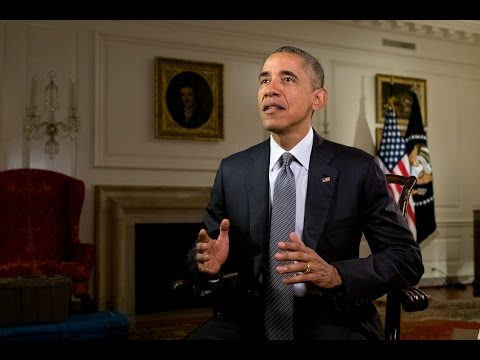

In [ ]:
# идентификатор видео ролика с Ютуб, введите свой
YOUTUBE_ID = '2AFpAATHXtc'
# посмотрим его 
YouTubeVideo(YOUTUBE_ID)

Скачиваем видео, конвертируем его звук в WAV файл и распознаем.

Распознавание выполняется скриптом run.py, которому указываем аргументы:
-  `--config_file conf.py` - файл конфигурации (conf.py)
-  `--mode=infer` - показывает что сеть работает в режиме расчета, а не обучения
-  `--infer_output_file=output.txt` - файл результата
-  `--use_horovod=False` - использовать ли специальное средство для распределенных вычислений (нет, у нас его нет)
-  `--num_gpus=1` - число графических процессоров
-  `--batch_size_per_gpu 1` - размер пакета

Он будет распознавать wav файлы в своей директории. 


In [ ]:

# удаляем лишние
!rm -rf *.wav
# скачиваем
!youtube-dl --extract-audio --audio-format wav --output "downloaded.%(ext)s" https://www.youtube.com/watch\?v\={YOUTUBE_ID}
# конвертируем
!ffmpeg -loglevel panic -y -i downloaded.wav -acodec pcm_s16le -ac 1 -ar 16000 {project_name}/test.wav
# распознаем
!cd {project_name} && python run.py --config_file conf.py --mode=infer --infer_output_file=output.txt --use_horovod=False --num_gpus=1 --batch_size_per_gpu 1

[youtube] 2AFpAATHXtc: Downloading webpage
[download] Destination: downloaded.m4a
[download] 100% of 2.73MiB in 00:42
[ffmpeg] Correcting container in "downloaded.m4a"
[ffmpeg] Destination: downloaded.wav
Deleting original file downloaded.m4a (pass -k to keep)











The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



*** Restoring from the latest checkpoint
*** Loading model from w2l_log_folder/model.ckpt-109800
*** Inference config:
{'batch_size_per_gpu': 1,
 'data_layer': <class 'open_seq2seq.data.speech2text.speech2text.Speech2TextDataLayer'>,
 'data_layer_params': {'dataset_files': ['test.csv'],
                       'input_type': 'logfbank',
                       'n

Печатаем результат. 

Прослушайте видео (там есть и субтитры) и сравните с нашим результатом.  

In [ ]:
!tail -n1 {project_name}/output.txt

test.wav, hieverybody in our house everybody knows that president is only the third most important job in the family so this we get a met to take a lottle extra time to say thank you to michel for the remarkable way she does the most important jout bigama am in a given extra thanks to my mother in law for the roe mal she's always been to michel in the countless selfless ways in which he help was shallin me raise moy ansuch i am incredibly luck to have these wonderful woman help me rays love and look after our cose i hope you' walts't take a moment to so thank you to the woman in your life who love you in that special way monster bylogical mobs the doctive moms and foster mots single moss grandmas godmothers atts mentors whoever you think of when you think a mother's da or take a moment like our walter remember the mobs who raised us whis big hearts sustained us and whom we mess every day no matter howld we get giving flowers is always a good idea but i hope that on this mother's day wi

# Задания
Проверьте работу на разных видео (английский язык):
- с мужским и женским голосом
- с сильным акцентом
- с посторонним звуком (фон или шум)
и др.



#Ссылки

Использованы и адаптированы материалы:

- 1. A. Graves, S. Fernández, F. Gomez, and J. Schmidhuber. Connectionist temporal classification: Labelling unsegmented sequence data with recurrent neural networks. In ICML, pages 369–376. ACM, 2006.

- 2. Collobert, Ronan, Christian Puhrsch, and Gabriel Synnaeve. "Wav2letter: an end-to-end convnet-based speech recognition system." arXiv preprint arXiv:1609.03193 (2016). https://arxiv.org/abs/1609.03193 
- 3. https://colab.research.google.com/github/tugstugi/dl-colab-notebooks/blob/master/notebooks/NVidiaWav2LetterPlus.ipynb
- 4. https://towardsdatascience.com/intuitively-understanding-connectionist-temporal-classification-3797e43a86c

